<a href="https://www.kaggle.com/code/jhtkoo0426/london-quality-of-life-analysis?scriptVersionId=146940741" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# London Quality of Life Analysis
This notebook aims to uncover trends and correlations in housing prices and average salaries across all 32 London boroughs between 1975 and 2019.

### Table of Contents
- [1. Loading packages and datasets](#Loading-packages-and-datasets)
- [2. Data cleaning](#Data-cleaning)
- [3. Analysing housing price trends](#Analysing-housing-price-trends)

## Loading packages and datasets

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import jedi

In [2]:
df = pd.read_csv("/kaggle/input/housing-in-london/housing_in_london_monthly_variables.csv")
df.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0
13548,2020-01-01,england,247355,E92000001,NaN,NaN,0


## Data cleaning
From the above cell, we note that:
1. There is no data available in the `no_of_crimes` column.
2. There are no housing prices for the year 2020.

### Cleaning formatting and empty datapoints

In [3]:
# Convert the "date" column into datetime format
df['date'] = pd.to_datetime(df['date'])

# Cleaning empty datapoints
df = df.loc[df['date'].dt.year < 2020]

# Cleaning NaN values
df = df.fillna(0)

df.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13543,2019-08-01,england,249432,E92000001,75079.0,0.0,0
13544,2019-09-01,england,249942,E92000001,64605.0,0.0,0
13545,2019-10-01,england,249376,E92000001,68677.0,0.0,0
13546,2019-11-01,england,248515,E92000001,67814.0,0.0,0
13547,2019-12-01,england,250410,E92000001,0.0,0.0,0


### Separating the dataset with London boroughs entries and non-London boroughs entries
Next, we will clean the `housing-in-london` dataset by London **boroughs**.
> The London boroughs are the 32 local authority districts that together with the City of London make up the administrative area of Greater London, England; each is governed by a London borough council. (Source: https://en.wikipedia.org/wiki/London_boroughs)

In [4]:
areas = df["area"]
f"Number of unique areas: {len(set(areas))}"

'Number of unique areas: 45'

From the above, there are 12 non-London borough areas. For now, we split the dataset into 2: London boroughs and areas that are not London boroughs.

In [5]:
boroughs = {'barking and dagenham', 'barnet', 'bexley', 'brent', 'bromley', 'camden', 'city of london', 'croydon', 'ealing', 'enfield',
            'greenwich', 'hackney', 'hammersmith and fulham', 'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow', 'islington', 
            'kensington and chelsea', 'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham', 'redbridge', 'richmond upon thames', 
            'southwark', 'sutton', 'tower hamlets', 'waltham forest', 'wandsworth', 'westminster'}

In [6]:
other_areas = set(areas) - boroughs
other_areas

{'east midlands',
 'east of england',
 'england',
 'inner london',
 'london',
 'north east',
 'north west',
 'outer london',
 'south east',
 'south west',
 'west midlands',
 'yorks and the humber'}

In [7]:
print(f"Number of boroughs: {len(boroughs)}")
print(f"Number of other areas: {len(other_areas)}")

Number of boroughs: 33
Number of other areas: 12


In [8]:
df_boroughs = df[df['area'].isin(boroughs)]
df_other_areas = df[df['area'].isin(other_areas)]
df_boroughs.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
9932,2019-08-01,westminster,914870,E09000033,156.0,7069.0,1
9933,2019-09-01,westminster,925955,E09000033,169.0,6384.0,1
9934,2019-10-01,westminster,927864,E09000033,168.0,7208.0,1
9935,2019-11-01,westminster,955615,E09000033,150.0,6843.0,1
9936,2019-12-01,westminster,968404,E09000033,0.0,7461.0,1


## Analysing housing price trends
In this section, we will analyse average housing price trends by London borough by year from 1975 to 2019.

Since the dataset lists average housing prices and the number of houses sold per month, we first aggregate the total amounts spent on house transactions for each borough per year.

In [9]:
df['total_price'] = df['average_price'] * df['houses_sold']

In [10]:
def housingPriceTrend(df: pd.DataFrame, *area):    
    def plotHousingPriceTrend(df_price_by_yr):
        # Plot housing price trends from 1975 to 2021
        fig, ax = plt.subplots(figsize=(12, 8))
        
        colormap = plt.cm.gist_ncar
        ax.ticklabel_format(style='plain')
        sns.lineplot(data=df_price_by_yr, x='date', y='average_price', hue='area')
        
        plt.title('Average Price by Area Over Time')
        plt.xlabel('Date')
        plt.ylabel('Average Price')
        plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, len(boroughs)))))
        plt.legend(title='Area', title_fontsize='15', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
    
    df_price_by_yr = df.groupby([df['date'].dt.year, df['area']])['average_price'].mean().reset_index()
    
    if area:
        df_price_by_yr = df_price_by_yr[df_price_by_yr['area'] == area]
    plotHousingPriceTrend(df_price_by_yr)

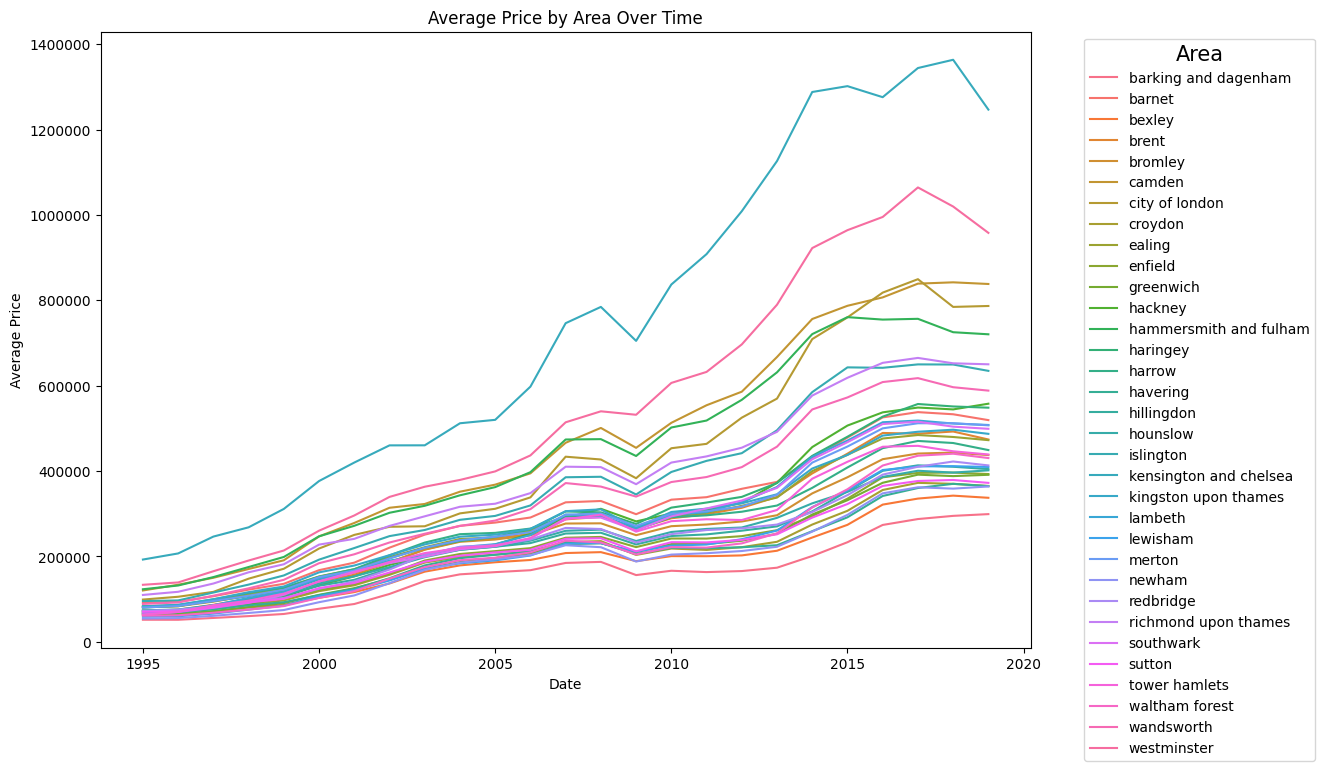

In [11]:
housingPriceTrend(df_boroughs)